Необходимо выявить закономерности, определяющие успешность компьютерной игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы.   

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB

### Изучение общей информации

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

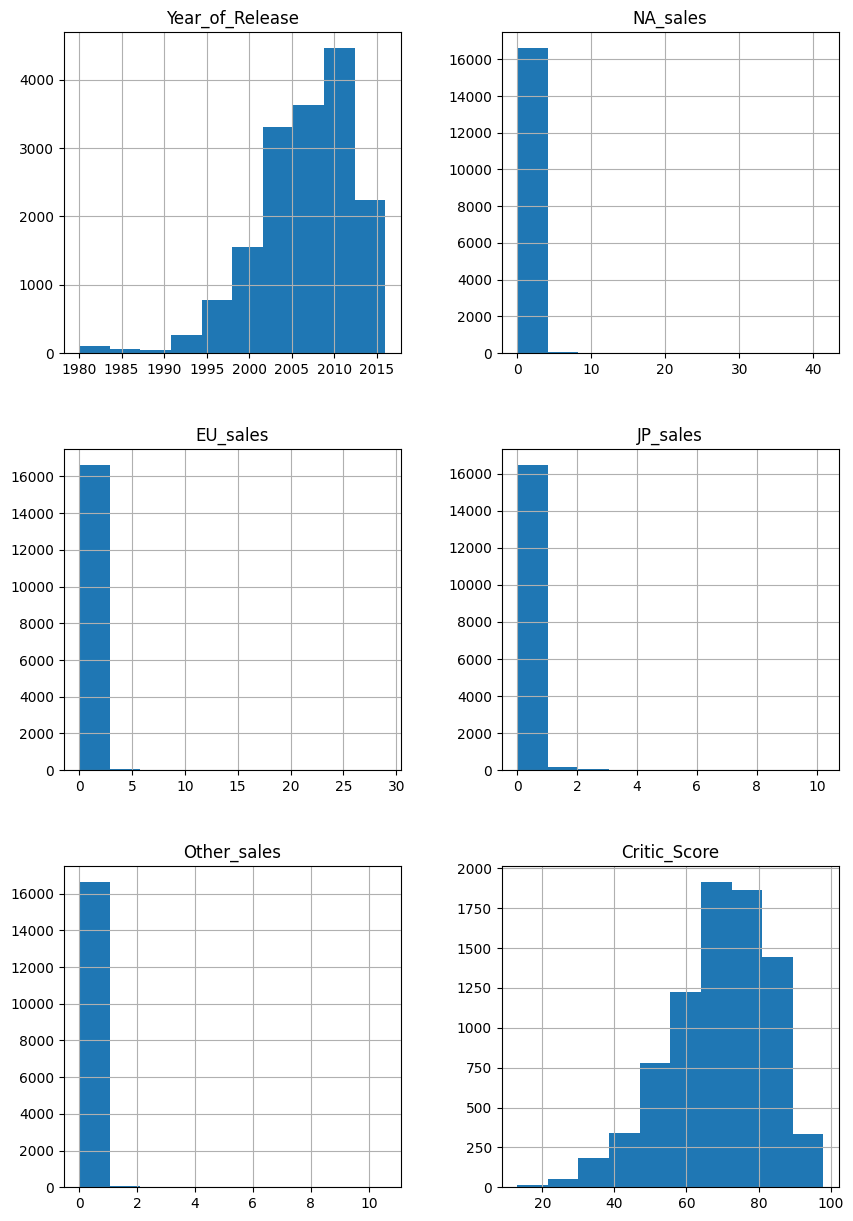

In [ ]:
data.hist(figsize=(10, 15));

Датасет содержит информацию о 16715 компьютерных играх. В таблице есть большое количество пропусков. К этому могло привести отсутствие данных о каких-либо играх в открытом доступе, так как вся информация бралась из открытых источников. Также пропуски могли появиться в связи с отсутствием информации о недавно выпущенных играх. Кроме того, некоторые типы данных нуждаются в замене.

### Предобработка данных

Проверим названия столбцов на наличие проблем в них.

In [ ]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем названия столбцов к нижнему регистру.

In [ ]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
#выведем информацию о датасете и посмотрим на типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Некоторые типы данных нуждаются в замене. В противном случае, дальнейшая обработка этих данных станет невозможна.

In [ ]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
#изменим тип данных в столбце 'year_of_release' с  float на Int64
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release'].dtype

Int64Dtype()

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
#изменим тип данных в столбце 'user_score' с  object на float
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].dtype

dtype('float64')

In [ ]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
#повторно выведем информацию по всем стоблцам датафрейма
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Тип данных был изменен на соответствующий:  
- В столбце 'year_of_release' на Int64, так как год - это целое число.  
- В столбце 'user_score' с  object на float, так как оценка пользователей указана в десятичных дробях.  В данном столбце присутствовала аббревиатура 'tbd' (To Be Determined (будет определено)), то есть значения в данных строках отсутствовали. Возможно, на момент сбора информации пользователи еще не поставили определенным компьютерным играм достаточно оценок. При изменении типа данных была произведена замена 'tbd' на NaN, что упростит дальнейшую работу с данными.

In [ ]:
#проверим наличие пропусков в данных
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
#выведем долю пропусков
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

<ipython-input-92-45ae299d868a>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')


,0
name,0.0
platform,0.0
year_of_release,1.6
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,51.3
user_score,54.6


Заполним пропуски в столбцах 'name', 'genre' и 'rating' на значение 'unknown', т.к. это категориальные переменные, информация о которых нам неизвестна.     
Пропуски в столбцах 'critic_score' и 'user_score' оставим, поскольку они нам не помешают в дальнейшем анализе, а заменить на что-то вменяемое не представляется возможным, поскольку при использовании числовой заглушки мы вынуждены будем в дальнейшем  фильтровать эти данные, чтобы не учитывать при анализе.




In [ ]:
#заполним пропуски в столбце 'name' на значение 'unknown'
data['name'] = data['name'].fillna('unknown')

In [ ]:
#заполним пропуски в столбце 'genre' на значение 'unknown'
data['genre'] = data['genre'].fillna('unknown')

In [ ]:
#заполним пропуски в столбце 'rating' на значение 'unknown'
data['rating'] = data['rating'].fillna('unknown')

Определим количество игр по рейтингу ESRB. Объединим малочисленные категории и заменим на аналогичные, но более часто используемые значения.

In [ ]:
data['rating'].value_counts()

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

Редко встречаются категории EC, K-A, RP, AO. Заменим ЕС («Early childhood») и K-A («Kids to Adults») на E10+ («Everyone 10 and older»); RP («Rating Pending») и АО («Adults Only 18+») на М («Mature»).

In [ ]:
data['rating'] = data['rating'].str.replace('EC', 'E10+')
data['rating'] = data['rating'].str.replace('K-A','E10+')
data['rating'] = data['rating'].str.replace('RP', 'M')
data['rating'] = data['rating'].str.replace('AO', 'M')
data['rating'].value_counts()

unknown    6766
E          3990
T          2961
M          1567
E10+       1431
Name: rating, dtype: int64

In [ ]:
#повторно проверим наличие пропусков в данных
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

### Добавление в таблицу новых столбцов

Добавим в таблицу новый столбец с суммарными продажами во всех регионах.

In [ ]:
data['regional_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,regional_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Исследовательский анализ данных

Посмотрим на изменение количества игр с течением времени.

Text(0, 0.5, 'Количество игр')

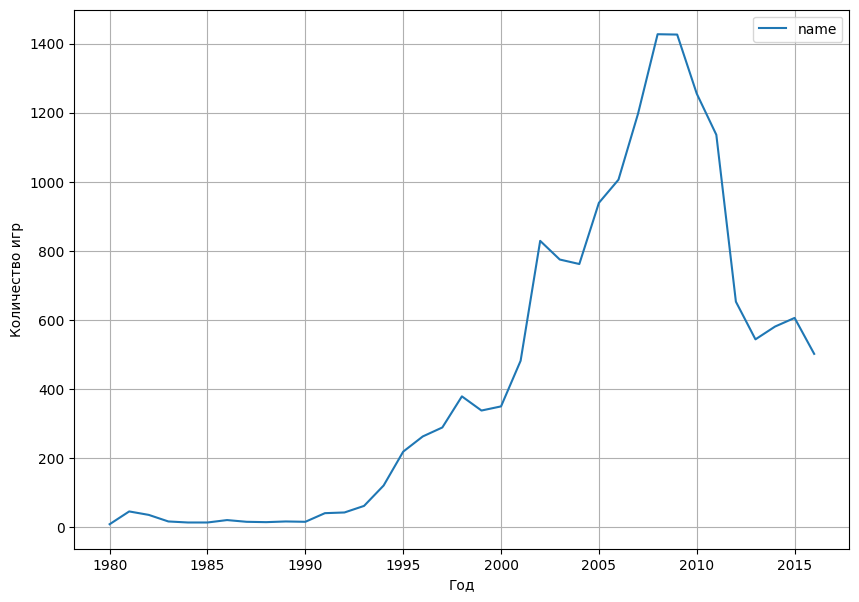

In [ ]:
ax = data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='line', grid=True, figsize=(10, 7))
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')

На основе графика можно сделать вывод, что до 1994 года количество выпускаемых игр было небольшим. Далее количество игр стало плавно увеличиваться. Рост наблюдается до 2008 г. С 2009 г. начался резкий спад. Вероятнее всего это связано с тем, что игры стали более высокотехнологичными и компании-разработчики сделали упор не на количество, а на качество.  

Для получения более репрезентативной информации ограничим датасет периодом с 1994 по 2016 год.

In [ ]:
#зададим датасету границы с 1994 по 2016 год
data_actual_years = data[data['year_of_release'] >= 1994]

Text(0, 0.5, 'Количество игр')

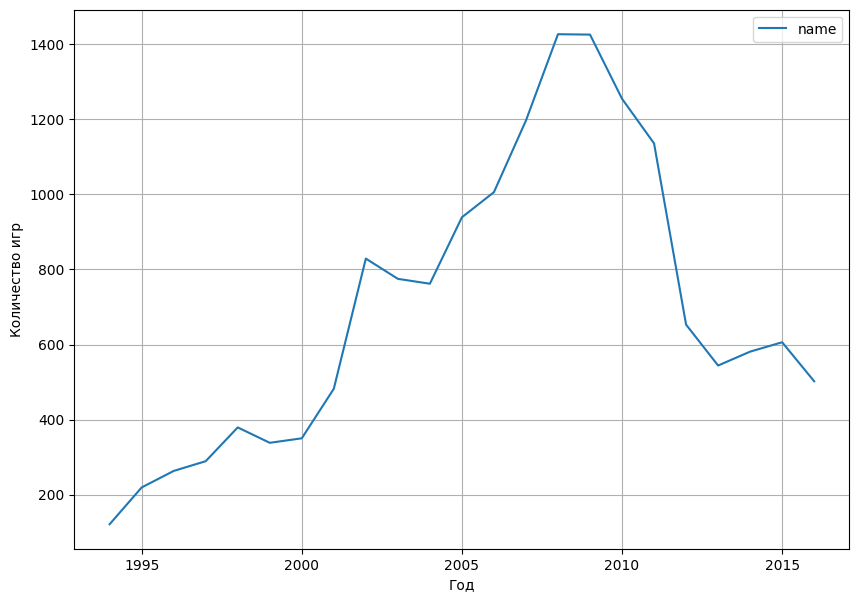

In [ ]:
ax = data_actual_years.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='line', grid=True, figsize=(10, 7))
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')

Посмотрим, как менялись продажи по платформам.

Определим суммарные продажи по каждой платформе в период с 1994 по 2016 год.

In [ ]:
platform_sales = data_actual_years.groupby('platform').agg({'regional_sales': 'sum'}).sort_values(by='regional_sales', ascending=False)
platform_sales

,regional_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'Продажи')

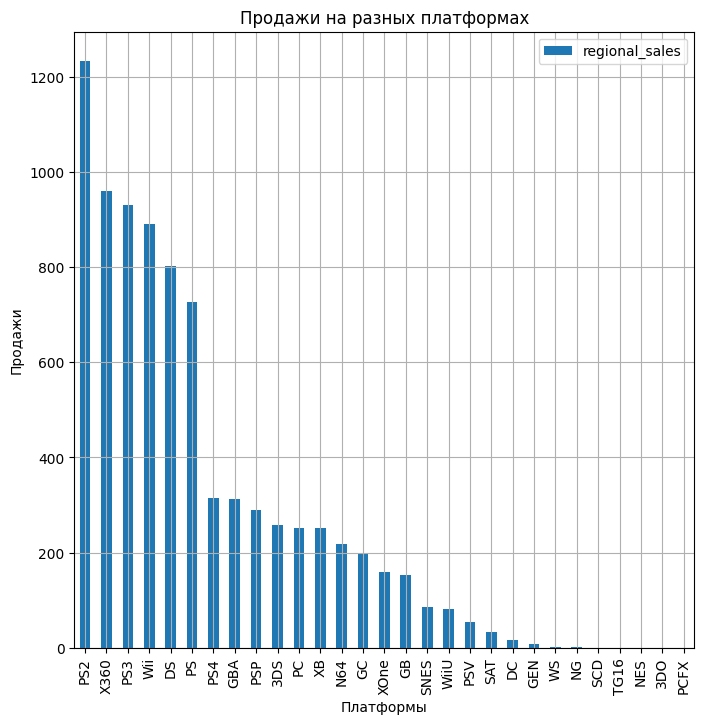

In [ ]:
ax = platform_sales.plot(kind='bar', grid=True, title='Продажи на разных платформах', figsize=(8,8))
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')

Платформы с наибольшими суммарными продажами: PS2 (1233.56), X360 (961.24), PS3	(931.34), Wii (891.18), DS (802.76) и PS (727.58).

Сделаем выборку по топовым платформам.

In [ ]:
#выборка по топовым платформам
platforms_top = data_actual_years.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')

Построим распределение по годам для платформ с наибольшими суммарными продажами.

In [ ]:
sales_by_year = platforms_top.pivot_table(index=['platform', 'year_of_release'], values='regional_sales', aggfunc='sum')
platform_sales_by_year = sales_by_year[sales_by_year['regional_sales']>100].sort_values(by='platform', ascending=False)
platform_sales_by_year

regional_sales
platform year_of_release                
X360     2011                     143.84
         2010                     170.03
         2009                     120.29
         2008                     135.26
Wii      2010                     127.95
         2009                     206.97
         2008                     171.32
         2007                     152.77
         2006                     137.15
PS3      2009                     130.93
         2013                     113.25
         2012                     107.36
         2011                     156.78
         2010                     142.17
         2008                     118.52
PS2      2006                     103.42
         2005                     160.66
         2004                     211.81
         2003                     184.31
         2002                     205.38
         2001                     166.43
PS       1999                     144.53
         1998                     169.49
         1997                     136.17
DS       2006                     119.81
         2009                     119.54
         2008                     145.31
         2007                     146.94
         2005                     130.14

На основе полученных данных можно сделать вывод, что с течением времени количество выручки на каждой платформе падает. Кроме того, при установленном пороговом значении в 100 в выборку практически не попали свежие данные: 2012 г. (PS3 107.36) и 2013 г. (PS3 113.25) попали только по одному разу.

Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

Text(-5.555555555555555, 0.5, 'Платформа')

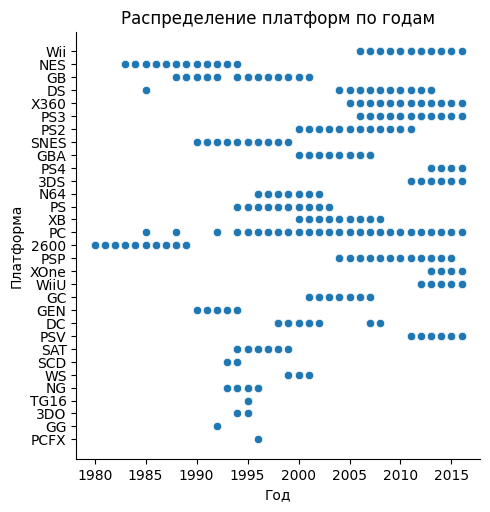

In [ ]:
sns.relplot(data = data, y = 'platform', x = 'year_of_release')
plt.title('Распределение платформ по годам')
plt.xlabel('Год')
plt.ylabel('Платформа')

Из графика видно, что в среднем платформы существуют 5-10 лет. PC лидирует по времени существования.

Посмотрим на среднюю "продолжительность жизни" популярных платформ.

Text(-4.430555555555555, 0.5, 'Платформа')

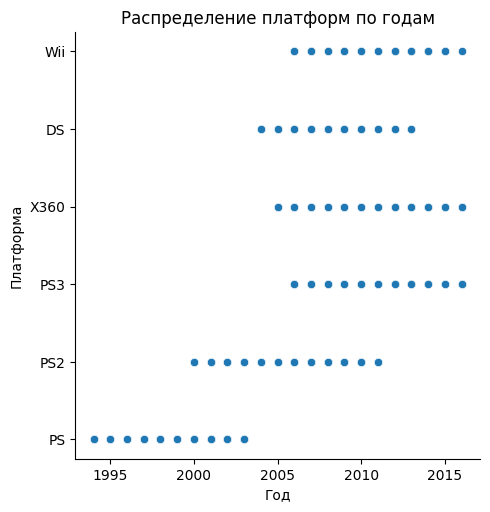

In [ ]:
sns.relplot(data = platforms_top, y = 'platform', x = 'year_of_release')
plt.title('Распределение платформ по годам')
plt.xlabel('Год')
plt.ylabel('Платформа')

В 2016 г. продолжали существовать платформы  Wii, X360 и PS3. Их и возьмем для дальнейшего анализа.

In [ ]:
actual_platforms = data_actual_years.query('platform in ["X360", "PS3", "Wii"]')

Определим актуальный период для дальнейшего анализа на основе данных по выбранным платформам.

<Axes: xlabel='year_of_release'>

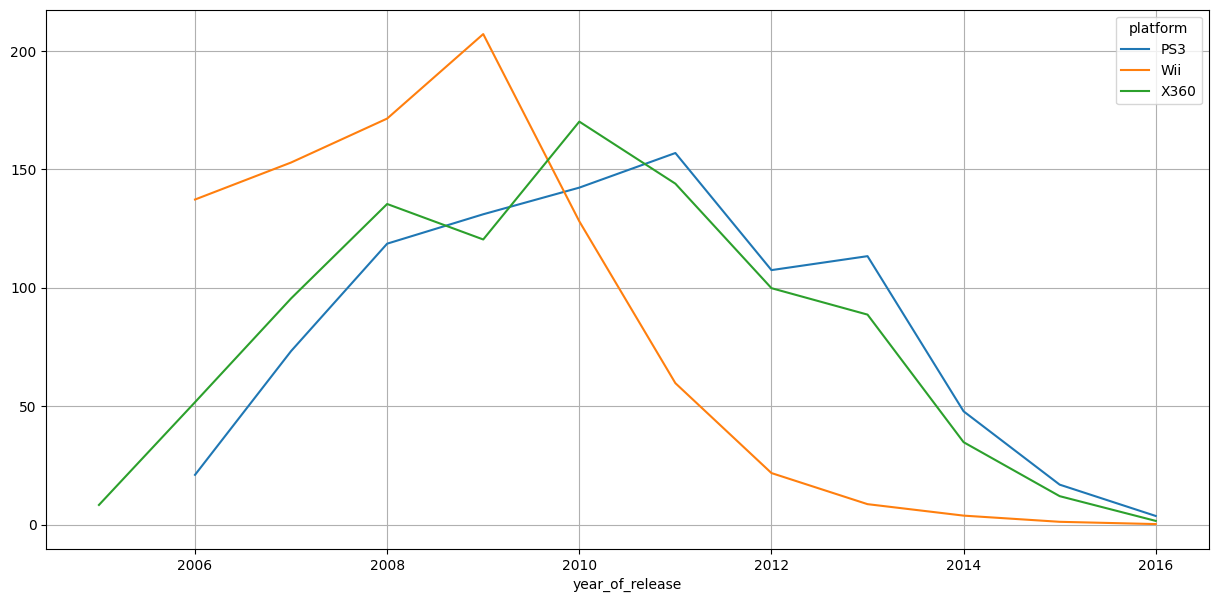

In [ ]:
actual_platforms.pivot_table(index='year_of_release', columns = 'platform', values='regional_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))

Пики популярности для всех рассматриваемых платформ приходятся примерно на 2009-2011 г. Однако же настолько отдаленный от 2017 г. период будет являться нерепрезентативным, поскольку за последующие годы ситуация на игровом рынке существенно изменилась. Будем считать актуальным период с 2012 г., т.к. в этом году так же наблюдается небольшой рост продаж на платформе PS3 и не столь значительный спад по сравенению с предшествующими несколькими годами для платформ X360 и Wii. Кроме того, период продолжительностью в 5 лет, непосредственно предшествующих 2017 г., будет обладать хорошей репрезентативностью благодаря актуальности данных.

In [ ]:
actual_platforms_years = actual_platforms[actual_platforms['year_of_release'] >= 2012]

Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам с самыми высокими продажами в рассматриваемый период (2012-2016 гг.).

Text(0, 0.5, 'Платформы')

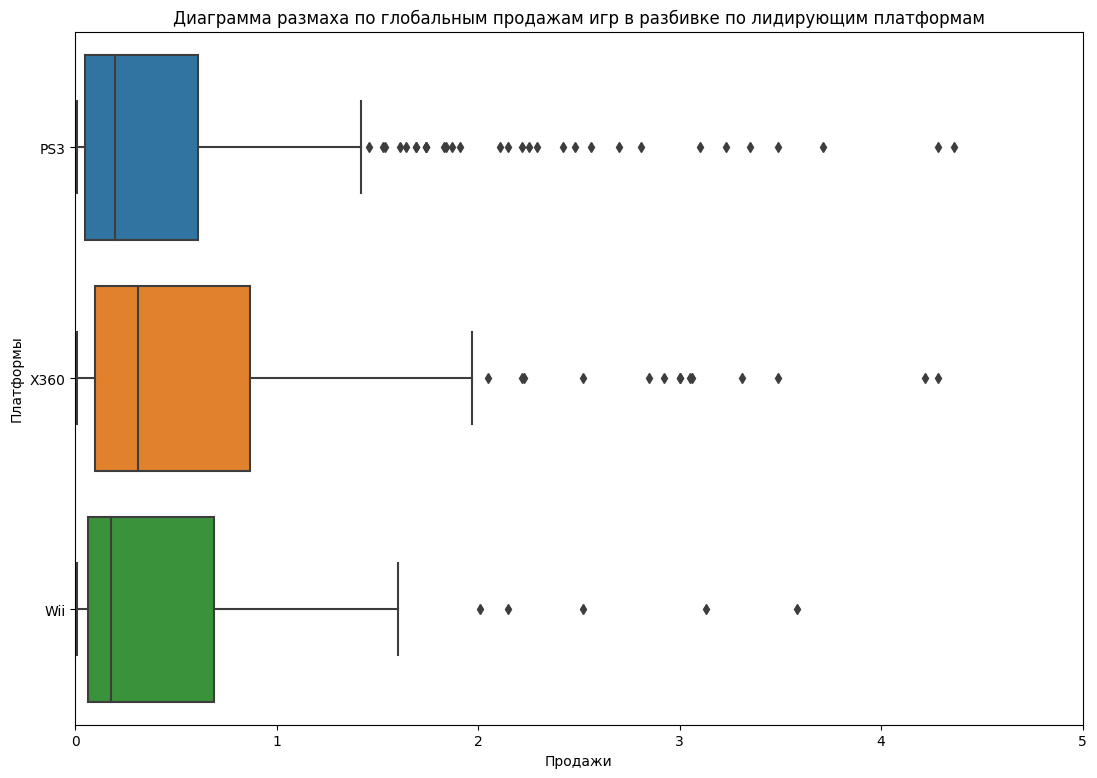

In [ ]:
plt.figure(figsize=(13,9))
plt.xlim(0,5)
plt.title("Диаграмма размаха по глобальным продажам игр в разбивке по лидирующим платформам")
ax = sns.boxplot(data=actual_platforms_years, x='regional_sales', y='platform')
ax.set_xlabel('Продажи')
ax.set_ylabel('Платформы')

Максимальное количество продаж имеет платформа X360, далее идет Wii, минимальные продажи у платформы PS3. Медианные значения по всем трем платформам различаются несущественно, примерно 0,2, 0,3. Наблюдаются отдельные выбросы.

In [ ]:
actual_platforms_years.groupby('platform')['regional_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
X360,292.0,0.810068,1.712069,0.01,0.1000,0.31,0.8700,16.27


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем в качестве примера платформу X360.

<Axes: title={'center': 'Влияние отзывов критиков на продажи для X360'}, xlabel='regional_sales', ylabel='critic_score'>

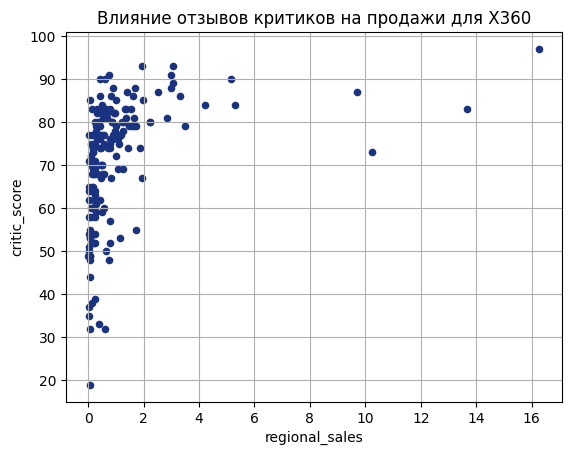

In [ ]:
#построим диаграмму рассеяния для определения влияния отзывов критиков на продажи для платформы X360
actual_platforms_years.query('platform in ["X360"]').plot(x='regional_sales', y='critic_score', kind='scatter', c= np.atleast_2d(np.array([0.1, 0.2, 0.5])), grid=True, title='Влияние отзывов критиков на продажи для X360')

In [ ]:
#посчитаем корреляцию между продажами X360 и отзывами критиков
actual_platforms_years.query('platform in ["X360"]')['regional_sales'].corr(actual_platforms_years['critic_score'])

0.36057348885073365

Корреляция между отзывами критиков и продажами на платформе X360 равна 0,4. На графике видно, что большое количество отзывов положительно сказывается на продажах.

<Axes: title={'center': 'Влияние отзывов пользователей на продажи X360'}, xlabel='regional_sales', ylabel='user_score'>

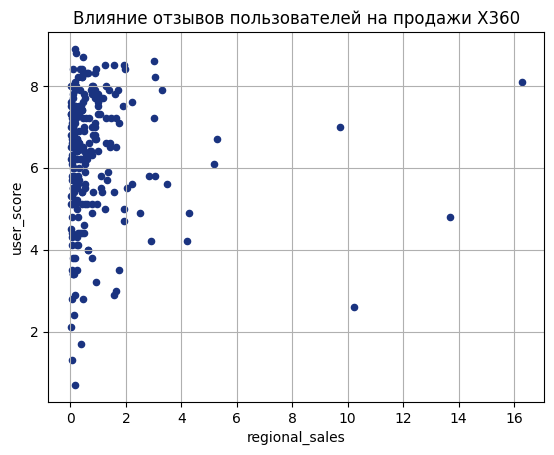

In [ ]:
#построим диаграмму рассеяния для определения влияния отзывов пользователей на продажи для платформы X360
actual_platforms_years.query('platform in ["X360"]').plot(x='regional_sales', y='user_score', kind='scatter', c= np.atleast_2d(np.array([0.1, 0.2, 0.5])), grid=True, title='Влияние отзывов пользователей на продажи X360')

In [ ]:
#посчитаем корреляцию между продажами и отзывами пользователей
actual_platforms_years.query('platform in ["X360"]')['regional_sales'].corr(actual_platforms_years['user_score'])

0.0061639786462133256

Корреляция между отзывами пользователей и продажами на платформе X360 не значительная 0,006.

Соотнесем полученные выводы с продажами игр на других платформах.

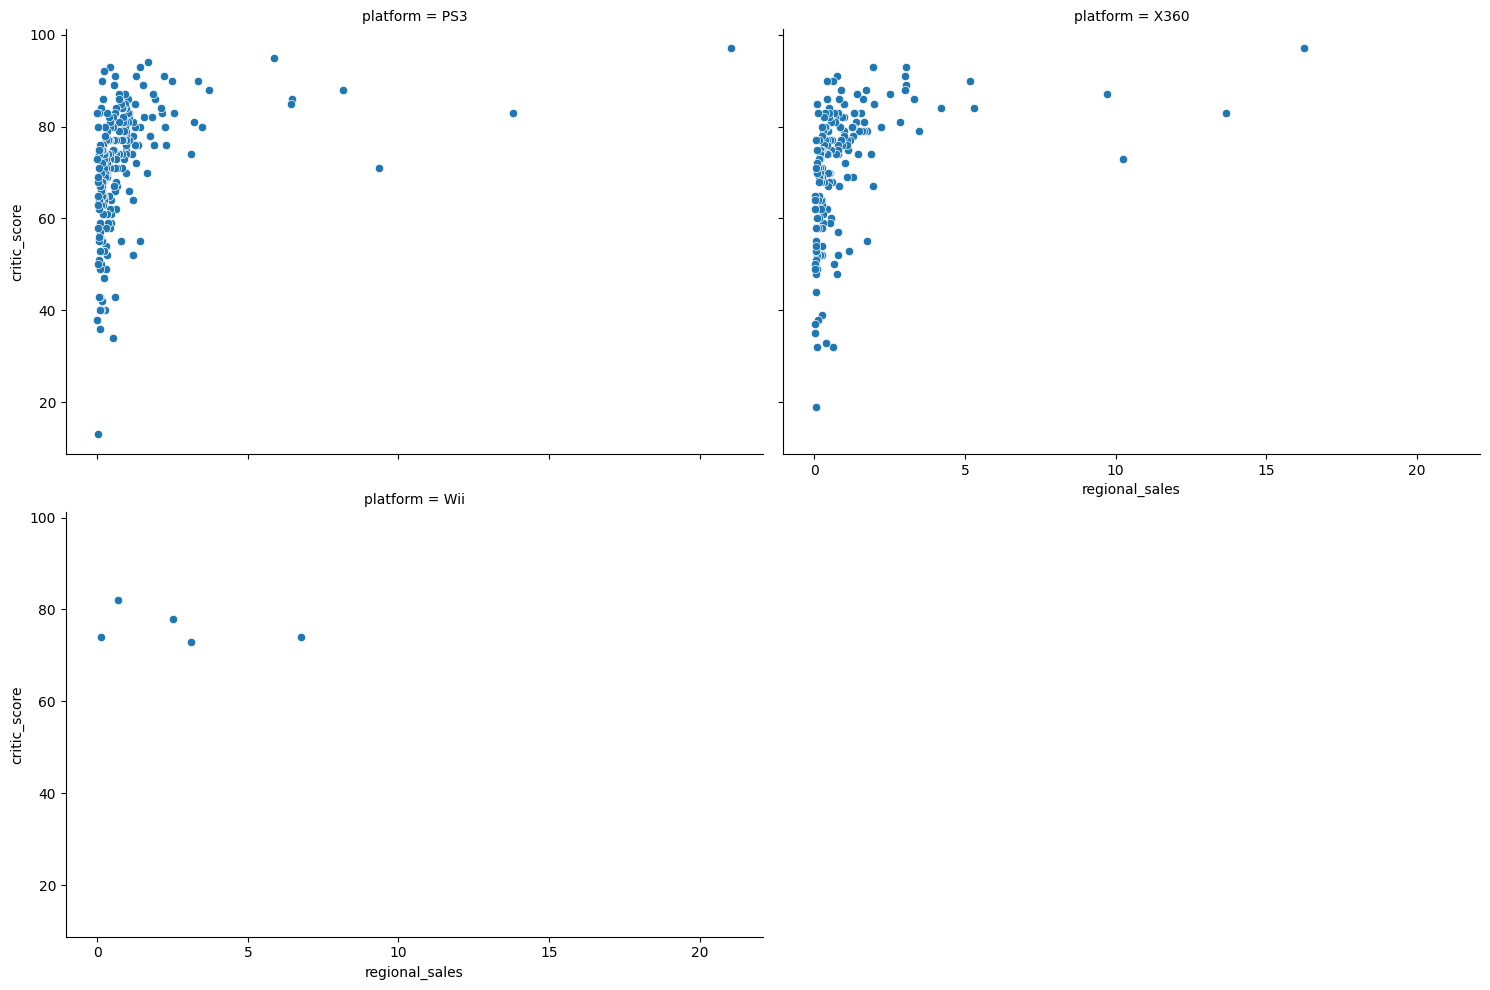

In [ ]:
#построим диаграммы рассеяния для определения влияния отзывов критиков на продажи для всех платформ
sns.relplot(x='regional_sales',
            y='critic_score',
            col='platform',
            col_wrap=2,
            aspect=1.5,
            data=actual_platforms_years);

In [ ]:
#посчитаем корреляцию между продажами и отзывами критиков
actual_platforms_years['regional_sales'].corr(actual_platforms_years['critic_score'])

0.3413615119461335

Корреляция между отзывами критиков и продажами равна 0,3. Она чуть ниже, чем для платформы PS3. Продажи платформы Wii практически совсем не зависият от отзывов критиков.

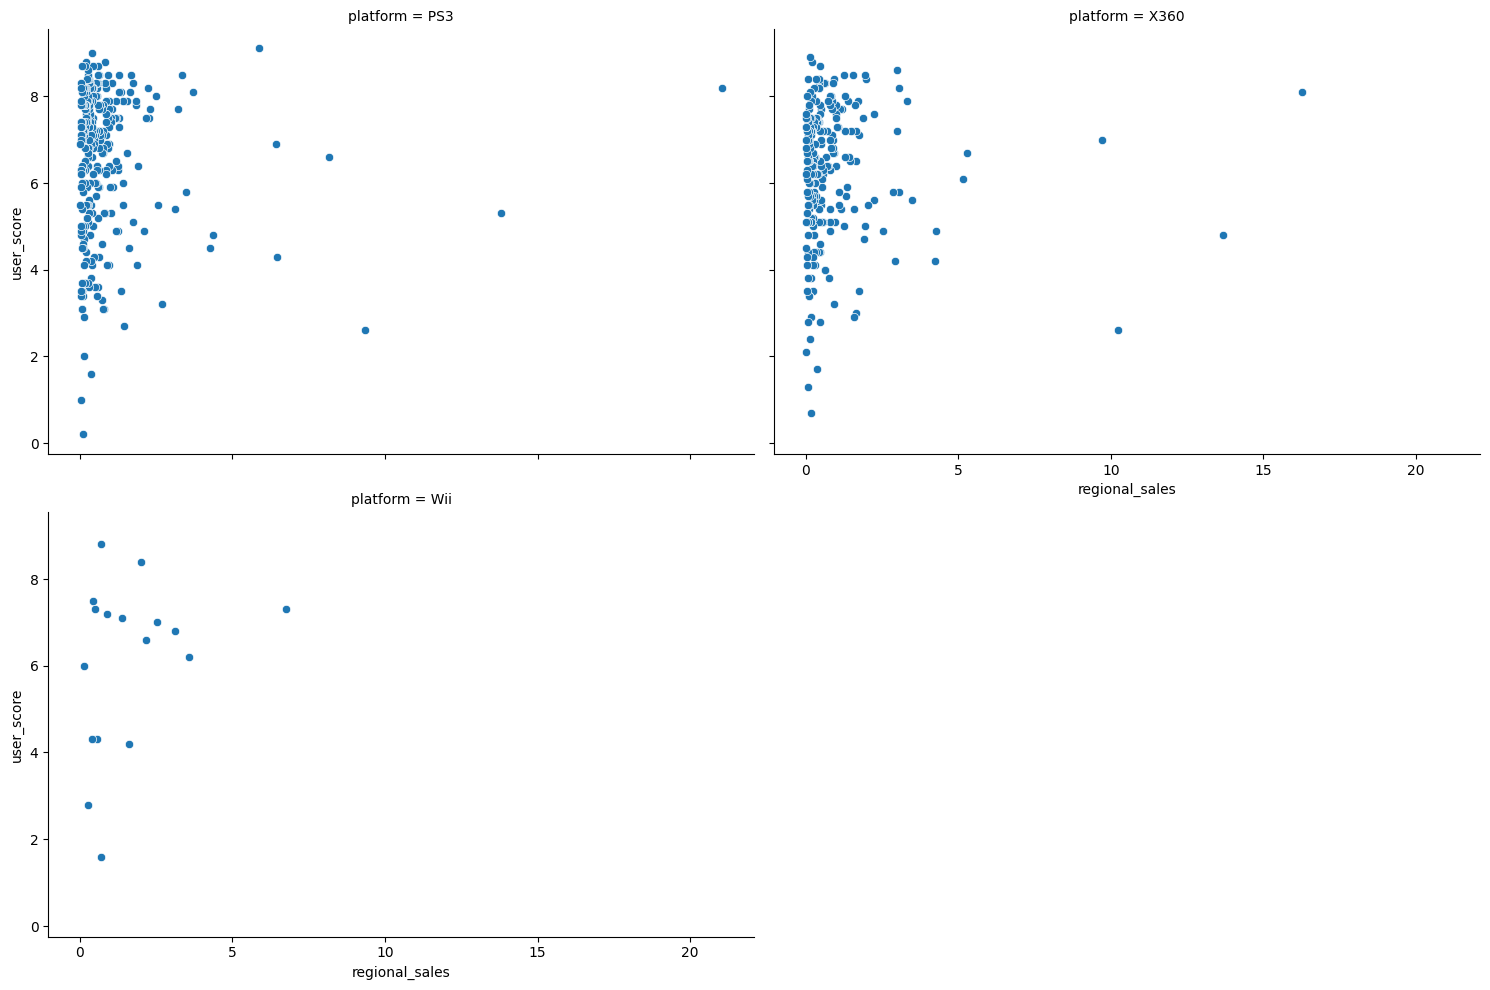

In [ ]:
#построим диаграммы рассеяния для определения влияния отзывов пользователей на продажи для всех платформ
sns.relplot(x='regional_sales',
            y='user_score',
            col='platform',
            col_wrap=2,
            aspect=1.5,
            data=actual_platforms_years);

In [ ]:
#посчитаем корреляцию между продажами и отзывами пользователей
actual_platforms_years['regional_sales'].corr(actual_platforms_years['user_score'])

0.006729830836508313

Корреляция между отзывами пользователей и продажами совсем не значительная 0,007. Она чуть выше, чем для платформы PS3.    

Таким образом, можно сделать вывод, что отзывы критиков имеют большее влияние на продажи, но также не играют существенной роли.

Посмотрим на общее распределение игр по жанрам.

In [ ]:
sales_by_genre = actual_platforms_years.groupby('genre').agg({'regional_sales': 'sum'}).sort_values(by='regional_sales', ascending=False)
sales_by_genre

,regional_sales
genre,
Action,208.10
Shooter,133.09
Sports,83.34
Misc,41.57
Role-Playing,33.48
Racing,19.98
Fighting,15.97
Adventure,9.55
Platform,8.65


Text(0, 0.5, 'Продажи')

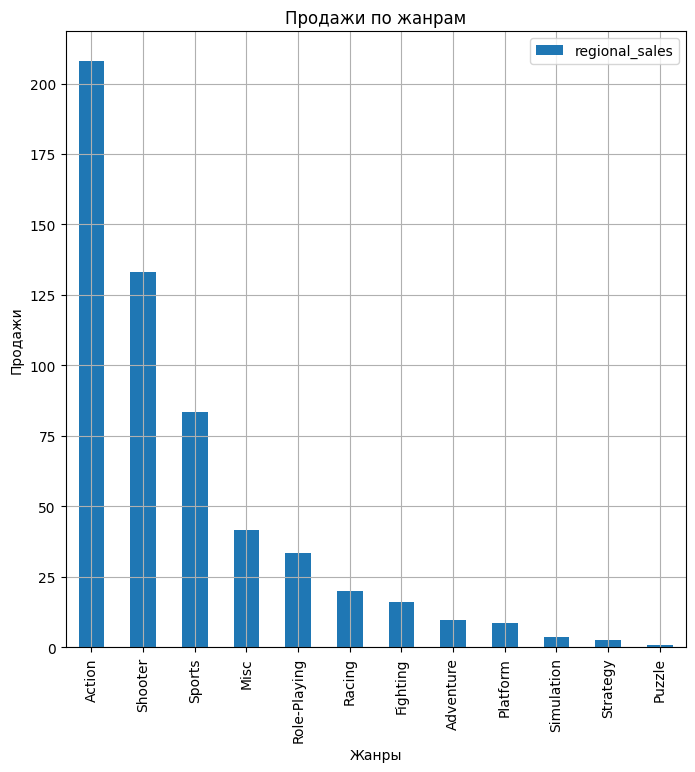

In [ ]:
ax = sales_by_genre.plot(kind='bar', grid=True, title='Продажи по жанрам', figsize=(8,8))
ax.set_xlabel('Жанры')
ax.set_ylabel('Продажи')

Самым популярным жанром является жанр Action (208.10). Далее идут игры в жанре Shooter (133.09) и Sports (83.34). Наименее популярны Strategy (2.74) и Puzzle (0.70).

Определим медиану продаж, чтобы исключить влияние на общие продажи игр одного жанра какой-либо одной популярной игры.

In [ ]:
actual_platforms_years.pivot_table(index=['genre'], values='regional_sales', aggfunc='median').sort_values(by='regional_sales', ascending=False)

,regional_sales
genre,
Shooter,0.420
Sports,0.395
Puzzle,0.350
Action,0.260
Strategy,0.260
Fighting,0.220
Misc,0.190
Racing,0.180
Role-Playing,0.180


Медиана продаж жанра Action всего 0.260, медиана же второго по популярности жанра Shooter 0.420, кроме того, это максимальная медиана по всем жанрам. Несмотря на большее количество продаж игр в жанре Action, медиана показывет, что большое вляние на общие продажи игр этого жанра оказала какая-то популярная игра. Следовательно, жанр Shooter является наиболее прибыльным.

### Портрет пользователей каждого региона

Определим топ-5 платформ для пользователей из Северной Америки.

In [ ]:
data_from_2012 = data[data['year_of_release'] >= 2012]
na_popular_platforms = data_from_2012.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
na_popular_platforms.head()

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


array([<Axes: ylabel='na_sales'>], dtype=object)

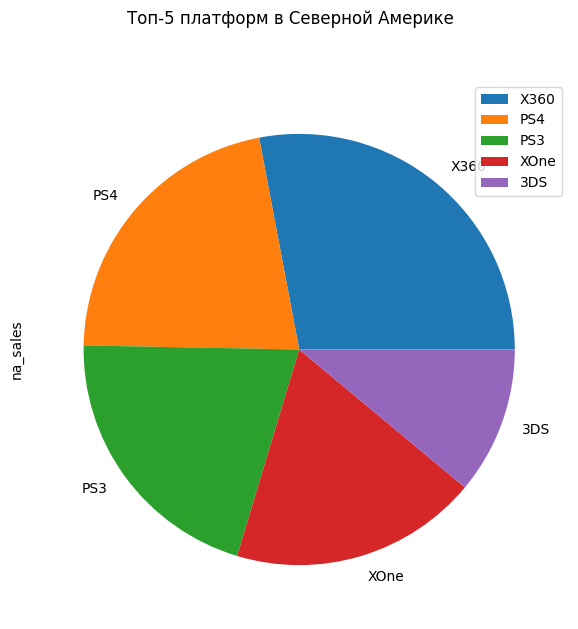

In [ ]:
na_popular_platforms.head().plot(kind='pie', title='Топ-5 платформ в Северной Америке', subplots=True, figsize=(7, 7))

На основе полученных данных можно сделать вывод, что наиболее популярные платформы в Северной Америке - X360, PS4, PS3, XOne, 3DS. Наибольшая доля продаж у X360 - 140.05. Платформы PS4 и PS3 имеют практически одинаковые доли - 108.74 и 103.38, чуть меньше продажи у XOne - 93.12. Наименьшая доля продаж у платформы 3DS - 55.31.

Определим топ-5 платформ для пользователей из Европы.  

In [ ]:
eu_popular_platforms = data_from_2012.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
eu_popular_platforms.head()

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


array([<Axes: ylabel='eu_sales'>], dtype=object)

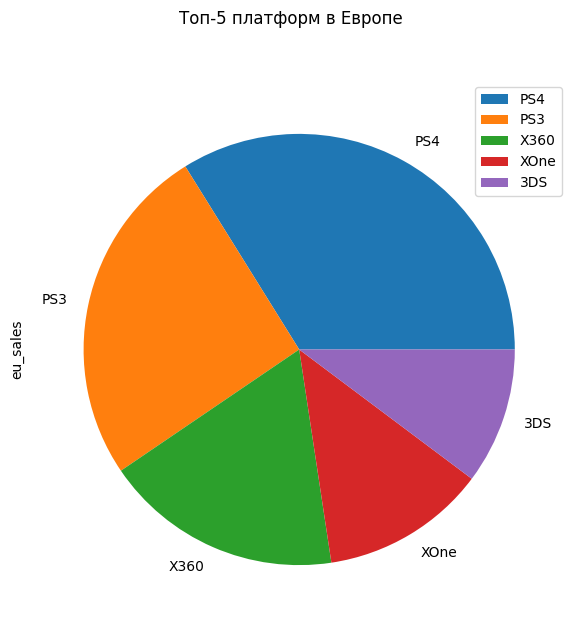

In [ ]:
eu_popular_platforms.head().plot(kind='pie', title='Топ-5 платформ в Европе', subplots=True, figsize=(7, 7))

Наиболее популярные платформы в Европе - PS4, PS3, X360, XOne, 3DS. Наибольшая доля продаж у PS4 - 141.09. Далее идет платформа PS3 - 106.86. Платформы X360 и XOne имеют доли 74.52 и 51.59 соответственно. Наименьшие доли продаж у платформы 3DS - 42.64.

Определим топ-5 платформ для пользователей из Японии.

In [ ]:
jp_popular_platforms = data_from_2012.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)
jp_popular_platforms.head()

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


array([<Axes: ylabel='jp_sales'>], dtype=object)

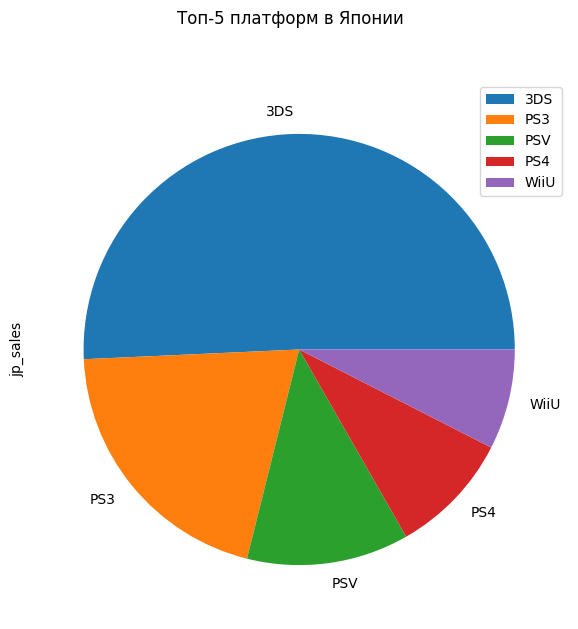

In [ ]:
jp_popular_platforms.head().plot(kind='pie', title='Топ-5 платформ в Японии', subplots=True, figsize=(7, 7))

На основе полученных данных можно сделать вывод, что наиболее популярные платформы в Японии - 3DS, PS3, PSV, PS4, WiiU. Половина всех продаж приходится на платформу 3DS - 87.79. Далее идут платформы PS3 (35.29) и PSV (21.04). Наименьшие доли продаж у платформ PS4 и WiiU - 15.96 и 13.01.

Определим топ-5 жанров для пользователей из Северной Америки.

In [ ]:
na_popular_genres = data_from_2012.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
na_popular_genres.head()

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


array([<Axes: ylabel='na_sales'>], dtype=object)

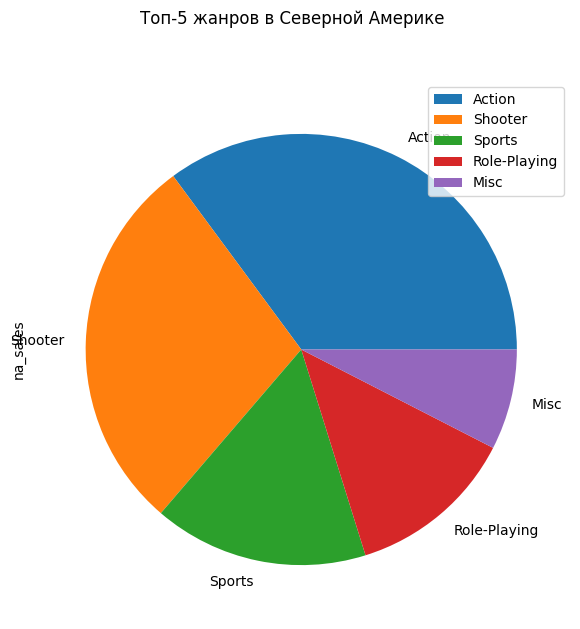

In [ ]:
na_popular_genres.head().plot(kind='pie', title='Топ-5 жанров в Северной Америке', subplots=True, figsize=(7, 7))

 Можно сделать вывод, что наиболее популярные жанры в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc. Наибольшая доля продаж у игр в жанре Action - 177.84. Далее по популярности идет жанр Shooter - 144.77. Жанры Sports и Role-Playing имеют доли 81.53 и 64.00. Наименьшая доля продаж у игр в жанре Misc - 38.19.

Определим топ-5 жанров для пользователей из Европы.

In [ ]:
eu_popular_genres = data_from_2012.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
eu_popular_genres.head()

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


array([<Axes: ylabel='eu_sales'>], dtype=object)

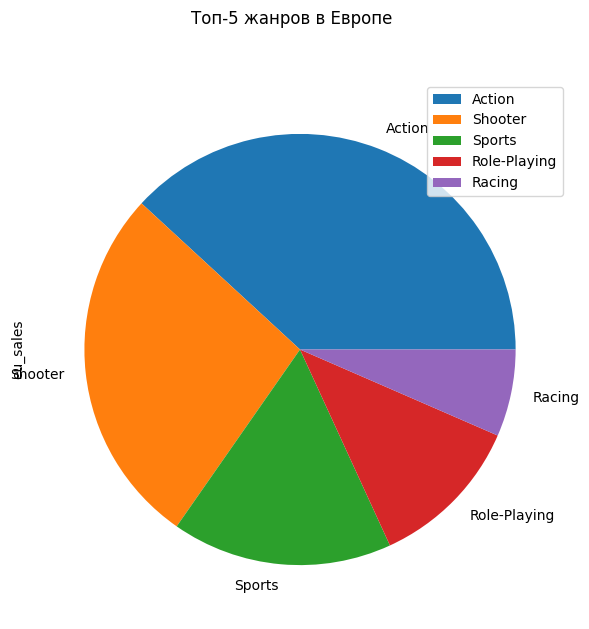

In [ ]:
eu_popular_genres.head().plot(kind='pie', title='Топ-5 жанров в Европе', subplots=True, figsize=(7, 7))

На основе полученных данных можно сделать вывод, что наиболее популярные жанры в Европе такие же, что и в Северной Америке, отличается только последний, пятый, жанр - Action, Shooter, Sports, Role-Playing, Racing. Наибольшая доля продаж у игр в жанре Action - 159.34. Далее следует жанр Shooter - 113.47. Жанры Sports и Role-Playing имеют доли 69.09 и 48.53. Наименьшая доля продаж у игр в жанре Racing - 27.29.

Определим топ-5 жанров для пользователей из Японии.

In [ ]:
jp_popular_genres = data_from_2012.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)
jp_popular_genres.head()

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


array([<Axes: ylabel='jp_sales'>], dtype=object)

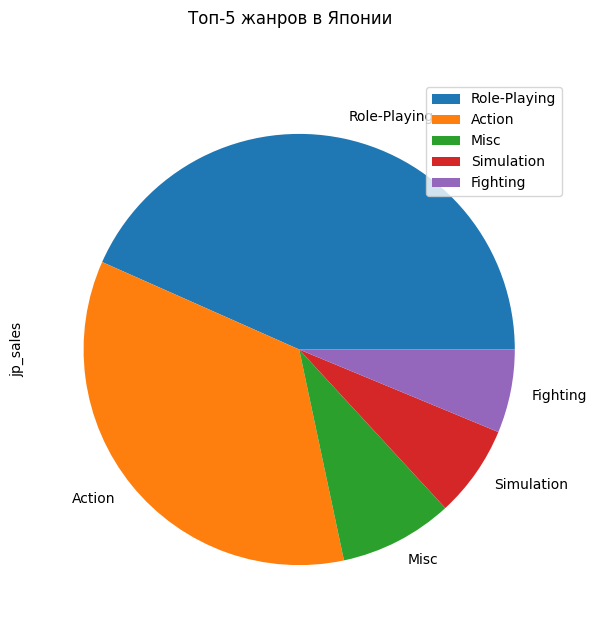

In [ ]:
jp_popular_genres.head().plot(kind='pie', title='Топ-5 жанров в Японии', subplots=True, figsize=(7, 7))

Наиболее популярным жанром в Японии является Role-Playing - 65.44. На втором месте по популярности Action - 52.80. Жанры Misc и Simulation имеют практически одинаковые доли - 12.86 и 10.41. Наименьшая доля продаж у игр в жанре Fighting - 9.44.

Определим, влияет ли рейтинг ESRB на продажи в Северной Америке.

In [ ]:
na_sales_by_rating = data_from_2012.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
na_sales_by_rating

,na_sales
rating,
M,231.57
E,114.37
unknown,103.31
E10+,75.70
T,66.02


Text(0, 0.5, 'Продажи')

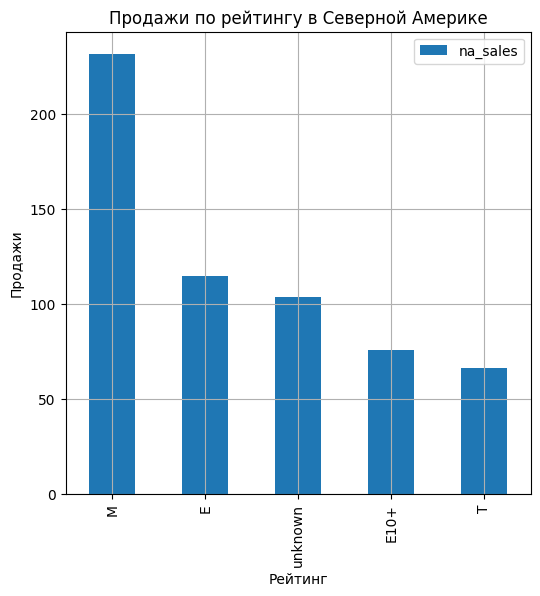

In [ ]:
ax = na_sales_by_rating.plot(kind='bar', grid=True, title='Продажи по рейтингу в Северной Америке', figsize=(6,6))
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Продажи')

На основе полученных данных можно сделать вывод, что наибольшей популярностью в Северной Америке пользуются игры с рейтингом «M» («Mature»), доля продаж 231.57. На втором месте рейтинг «E» («Everyone»), доля продаж 114.37. Достаточно большой блок образовали игры, рейтинг которых не был указан в таблице - 103.31. С меньшими долями продаж игры с рейтингом «E10+» («Everyone 10 and older») (доля продаж 75.70) и «T» («Teen») (доля продаж 66.02).

Определим, влияет ли рейтинг ESRB на продажи в Европе.

In [ ]:
eu_sales_by_rating = data_from_2012.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
eu_sales_by_rating

,eu_sales
rating,
M,193.96
E,113.03
unknown,91.50
E10+,55.37
T,52.96


Text(0, 0.5, 'Продажи')

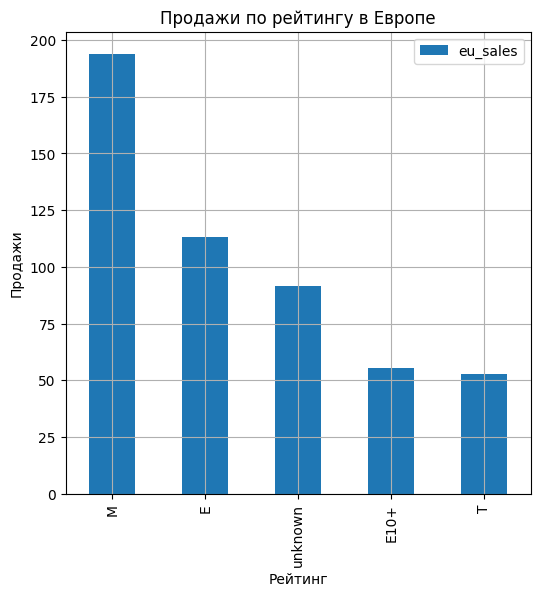

In [ ]:
ax = eu_sales_by_rating.plot(kind='bar', grid=True, title='Продажи по рейтингу в Европе', figsize=(6,6))
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Продажи')

Наибольшей популярностью в Европе пользуются игры с тем же рейтингом, что и в Северной Америке. На первом месте «M» («Mature»), доля продаж 193.96. На втором месте рейтинг «E» («Everyone»), доля продаж 113.03. С меньшей долей продаж игры, рейтинг которых не был указан (доля продаж 91.50). Замыкают список игры с рейтингом «E10+» («Everyone 10 and older») (доля продаж 55.37) и «T» («Teen») (доля продаж 52.96).

Определим, влияет ли рейтинг ESRB на продажи в Японии.

In [ ]:
jp_sales_by_rating = data_from_2012.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)
jp_sales_by_rating

,jp_sales
rating,
unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


Text(0, 0.5, 'Продажи')

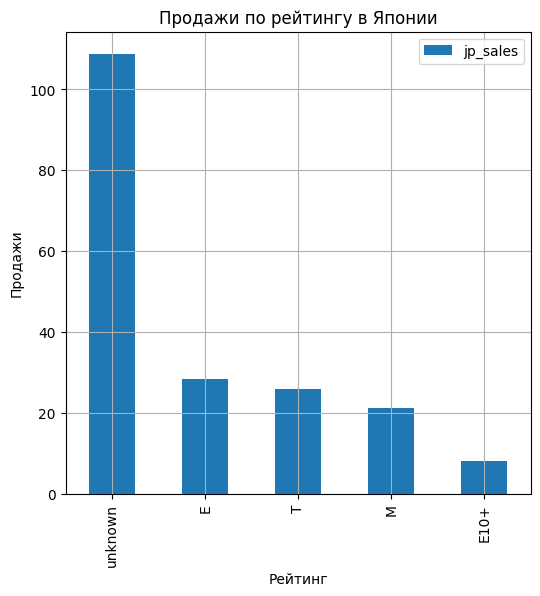

In [ ]:
ax = jp_sales_by_rating.plot(kind='bar', grid=True, title='Продажи по рейтингу в Японии', figsize=(6,6))
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Продажи')

Наибольшей популярностью в Японии пользуются игры, рейтинг которых не был указан, доля продаж 108.84. На втором месте рейтинг «E» («Everyone»), доля продаж 28.33. Практически одинаковые показатели имеют игры с рейтингом «T» («Teen») (доля продаж 26.02) и «M» («Mature») (доля продаж 21.20). На последнем месте  «E10+» («Everyone 10 and older») (доля продаж 8.19).

Таким образом, можно сделать вывод, что пользователи из Японии существенно отличаются в своих предпочтениях от пользователей из Северной Америки и Европы, которые, в свою очередь, отличаются друг от друга незначительно (различается только доля продаж).

### Проверка гипотез

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: средние пользовательские рейтинги платформы Xbox One = средним пользовательским рейтингам платформы PC   
H_1: средние пользовательские рейтинги платформы Xbox One ≠ средним пользовательским рейтингам платформы PC   
alpha = 0.05

In [ ]:
platform_xbox_one = data_from_2012.query('platform in ["XOne"]').pivot_table(index='name', values='user_score', aggfunc='mean')
platform_pc = data_from_2012.query('platform in ["PC"]').pivot_table(index='name', values='user_score', aggfunc='mean')
results = st.ttest_ind(platform_xbox_one, platform_pc, equal_var = False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

[0.5489538]
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports  разные.

H_0: средние пользовательские рейтинги жанра Action = средним пользовательским рейтингам жанра Sports   
H_1: средние пользовательские рейтинги жанра Action ≠ средним пользовательским рейтингам жанра Sports   
alpha = 0.05

In [ ]:
action_user_score  = data_from_2012[data_from_2012['genre'] == 'Action'].pivot_table(index='name', values='user_score', aggfunc='mean')
sports_user_score = data_from_2012[data_from_2012['genre'] == 'Sports'].pivot_table(index='name', values='user_score', aggfunc='mean')
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

[2.53730733e-09]
Отвергаем нулевую гипотезу


H_0 была сформулирована так, чтобы был использован знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения. Исходя из H_0, была сформулирована альтернативная гипотеза H_1, с учетом того, что это утверждение, которое принимается верным, если отбрасывается H_0.  
В нашем случае первая нулевая гипотеза не была отвергнута, т.к. p-value больше порогового значения alpha (0.05). Во втором случае нулевая гипотеза была отвергнута, т.к. p-value меньше порогового значения alpha (0.05).

### Общий вывод

До 1994 года количество выпускаемых игр было небольшим. Далее количество игр стало плавно увеличиваться. Рост наблюдается до 2008 г. С 2009 г. начался резкий спад. Вероятнее всего это связано с тем, что игры стали более высокотехнологичными и компании-разработчики сделали упор не на количество, а на качество.   
В ходе анализа было выявлено, что к платформам с наибольшими суммарными продажами относятся: PS2 (1233.56), X360 (961.24), PS3 (931.34), Wii (891.18), DS (802.76) и PS (727.58) (в скобках указанны миллионы проданных копий). С течением времени количество выручки на каждой платформе падает. В среднем платформы существуют 5-10 лет. К 2016 г. продолжали существовать платформы Wii, X360 и PS3. Их мы и взяли для дальнейшего анализа.   
Пики популярности для всех рассматриваемых платформ приходятся примерно на 2009-2011 г. Однако же настолько отдаленный от 2017 г. период является не репрезентативным, поскольку за последующие годы ситуация на игровом рынке существенно изменилась.  В 2012 г. так же наблюдается небольшой рост продаж на платформе PS3 и не столь значительный спад по сравенению с предшествующими несколькими годами для платформ X360 и Wii. Кроме того, период продолжительностью в 5 лет, непосредственно предшествующих 2017 г., обладает хорошей репрезентативностью благодаря актуальности данных. Именно поэтому для выявления закономерностей, определяющих успешность компьютерных игр, были рассмотрены данные за период  2012-2016 г.            
В рамках общего анализа было проведено исследование влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. В качестве примера была выбрана одна из самых популярных платформ X360. Корреляция между отзывами критиков и продажами на платформе X360 равна 0,4: большое количество отзывов имеет небольшое положительное влияние на продажи. Корреляция между отзывами пользователей и продажами на платформе X360 совсем не существенна 0,006.          
Полученные данные были соотнесены с продажами игр на других популярных платформах. Корреляция между отзывами критиков и продажами равна 0,3. Она чуть ниже, чем для платформы PS3. Корреляция между отзывами пользователей и продажами также почти не отличается 0,007. Таким образом, можно сделать вывод, что отзывы не играют большой роли при формировании продаж.         
С учетом медианы самым прибыльным жанром является жанр Shooter (медиана 0.42). Далее идут игры в жанре Action (медиана 208.1) и Sports (83.34). Самые низкие продажи у Strategy (2.74) и Puzzle (0.70).      
Были составлены портреты пользователей из Северной Америки, Европы и Японии. Результаты показали, что пользователи из Японии существенно отличаются в своих предпочтениях от пользователей из Северной Америки и Европы, которые, в свою очередь, отличаются друг от друга незначительно (различается только доля продаж).      
Так, наиболее популярные платформы в Северной Америке - X360, PS4, PS3, XOne, 3DS. Наибольшая доля продаж у X360 - 140.05. Платформы PS4 и PS3 имеют практически одинаковые доли - 108.74 и 103.38, чуть меньше продажи у XOne - 93.12. Наименьшая доля продаж у платформы 3DS - 55.31.      
Наиболее популярные платформы в Европе - PS4, PS3, X360, XOne, 3DS. Наибольшая доля продаж у PS4 - 141.09. Далее идет платформа PS3 - 106.86. Платформы X360 и XOne имеют доли 74.52 и 51.59 соответственно. Наименьшие доли продаж у платформы 3DS - 42.64.   
Наиболее популярные платформы в Японии - 3DS, PS3, PSV, PS4, WiiU. Половина всех продаж приходится на платформу 3DS - 87.79. Далее идут платформы PS3 (35.29) и PSV (21.04). Наименьшие доли продаж у платформ PS4 и WiiU - 15.96 и 13.01.      
Наиболее популярные жанры в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc. Наибольшая доля продаж у игр в жанре Action - 177.84. Далее по популярности идет жанр Shooter - 144.77. Жанры и Role-Playing имеют доли 81.53 и 64.00. Наименьшая доля продаж у игр в жанре Misc - 38.19.      
Наиболее популярные жанры в Европе такие же, что и в Северной Америке, отличается только последний, пятый, жанр - Action, Shooter, Sports, Role-Playing, Racing. Наибольшая доля продаж у игр в жанре Action - 159.34. Далее следует жанр Shooter - 113.47. Жанры Sports и Role-Playing имеют доли 69.09 и 48.53. Наименьшая доля продаж у игр в жанре Racing - 27.29.      
Наиболее популярным жанром в Японии является Role-Playing - 65.44. На втором месте по популярности Action - 52.80. Жанры Misc и Simulation имеют практически одинаковые доли - 12.86 и 10.41. Наименьшая доля продаж у игр в жанре Fighting - 9.44.      
Наибольшей популярностью в Северной Америке пользуются игры с рейтингом «M» («Mature»), доля продаж 231.57. На втором месте рейтинг «E» («Everyone»), доля продаж 114.37. Достаточно большой блок образовали игры, рейтинг которых не был указан в таблице, - 103.31. С меньшими долями продаж игры с рейтингом «E10+» («Everyone 10 and older») (доля продаж 75.70) и «T» («Teen») (доля продаж 66.02).      
В Европе наибольшую популярность имеют игры с тем же рейтингом, что и в Северной Америке. На первом месте «M» («Mature»), доля продаж 193.96. На втором месте рейтинг «E» («Everyone»), доля продаж 113.03. С меньшей долей продаж игры, рейтинг которых не был указан (доля продаж 91.50). Замыкают игры с рейтингом «E10+» («Everyone 10 and older») (доля продаж 55.37) и «T» («Teen») (доля продаж 52.96).      
В Японии же наиболее популярны  игры, рейтинг которых не был указан, доля продаж 108.84. На втором месте рейтинг «E» («Everyone»), доля продаж 28.33. Практически одинаковые показатели имеют игры с рейтингом «T» («Teen») (доля продаж 26.02) и «M» («Mature») (доля продаж 21.20). На последнем месте «E10+» («Everyone 10 and older») (доля продаж 8.19).